In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\world_tourism_economy_data.csv')

# Setting visualization styles
sns.set(style="whitegrid")

In [3]:
# View a sample of the dataset
df.sample(10)

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
822,Bosnia and Herzegovina,BIH,2002,3.070000e+08,1.600000e+05,18.789712,NaN,2.355657,6.728221e+09,NaN,NaN
1595,Zimbabwe,ZWE,2004,1.940000e+08,1.854000e+06,NaN,4.980000e+05,NaN,5.805598e+09,NaN,4.390000
3521,East Asia & Pacific,EAS,2012,NaN,3.417316e+08,5.839805,2.759840e+08,4.494521,2.117784e+13,2.974608,3.831841
1858,"Yemen, Rep.",YEM,2005,NaN,NaN,NaN,NaN,3.761962,1.673157e+10,11.811264,16.050000
4148,Mali,MLI,2014,2.139000e+08,1.680000e+05,6.601684,NaN,4.222549,1.436494e+10,0.883815,6.376000
6636,Uzbekistan,UZB,2023,NaN,NaN,NaN,NaN,NaN,1.015918e+11,NaN,NaN
4893,IDA blend,IDB,2017,1.015171e+10,NaN,7.605098,NaN,9.676620,1.012162e+12,1.650495,NaN
1090,Belize,BLZ,2003,NaN,9.990000e+05,NaN,NaN,7.675349,1.308900e+09,2.318083,NaN
5714,Latin America & Caribbean (excluding high income),LAC,2020,NaN,NaN,NaN,NaN,NaN,4.047056e+12,2.002412,10.565920
5609,"Bahamas, The",BHS,2020,1.007000e+09,1.794500e+06,59.641502,NaN,4.866892,9.958200e+09,0.038521,NaN


In [5]:
# Checking for missing values
df.isnull().sum()

country                    0
country_code               0
year                       0
tourism_receipts        2361
tourism_arrivals        1701
tourism_exports         2536
tourism_departures      4061
tourism_expenditures    2477
gdp                      226
inflation                982
unemployment            2992
dtype: int64

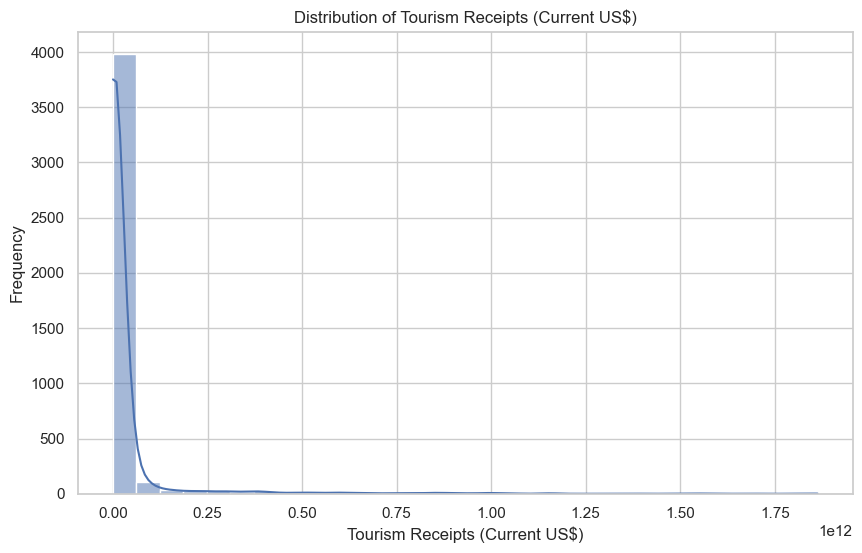

In [7]:
# Histogram for tourism receipts distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['tourism_receipts'], kde=True, bins=30)
plt.title('Distribution of Tourism Receipts (Current US$)')
plt.xlabel('Tourism Receipts (Current US$)')
plt.ylabel('Frequency')
plt.show()

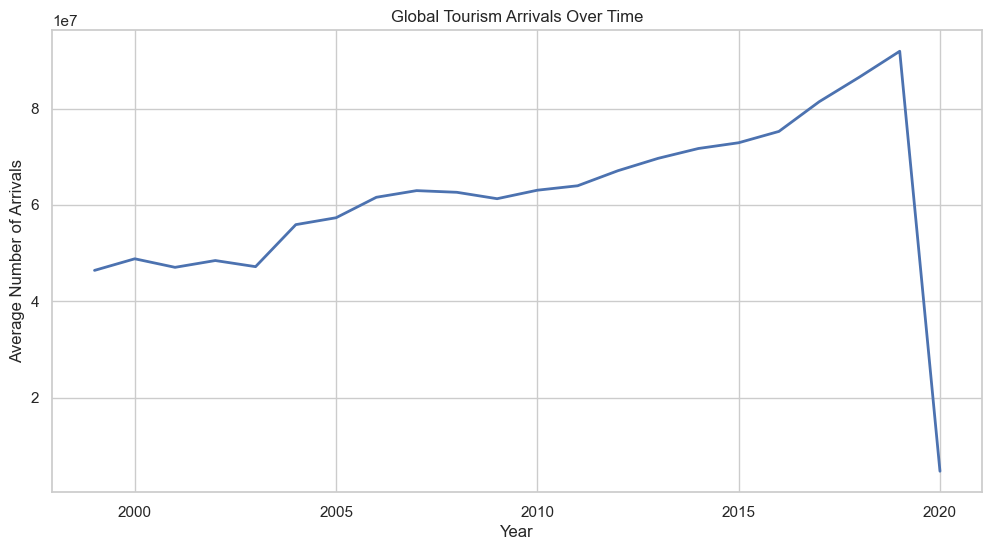

In [9]:
# Tourism arrivals over time (global average)
plt.figure(figsize=(12, 6))
global_tourism_arrivals = df.groupby('year')['tourism_arrivals'].mean()
global_tourism_arrivals.plot(kind='line', linewidth=2)
plt.title('Global Tourism Arrivals Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number of Arrivals')
plt.grid(True)
plt.show()

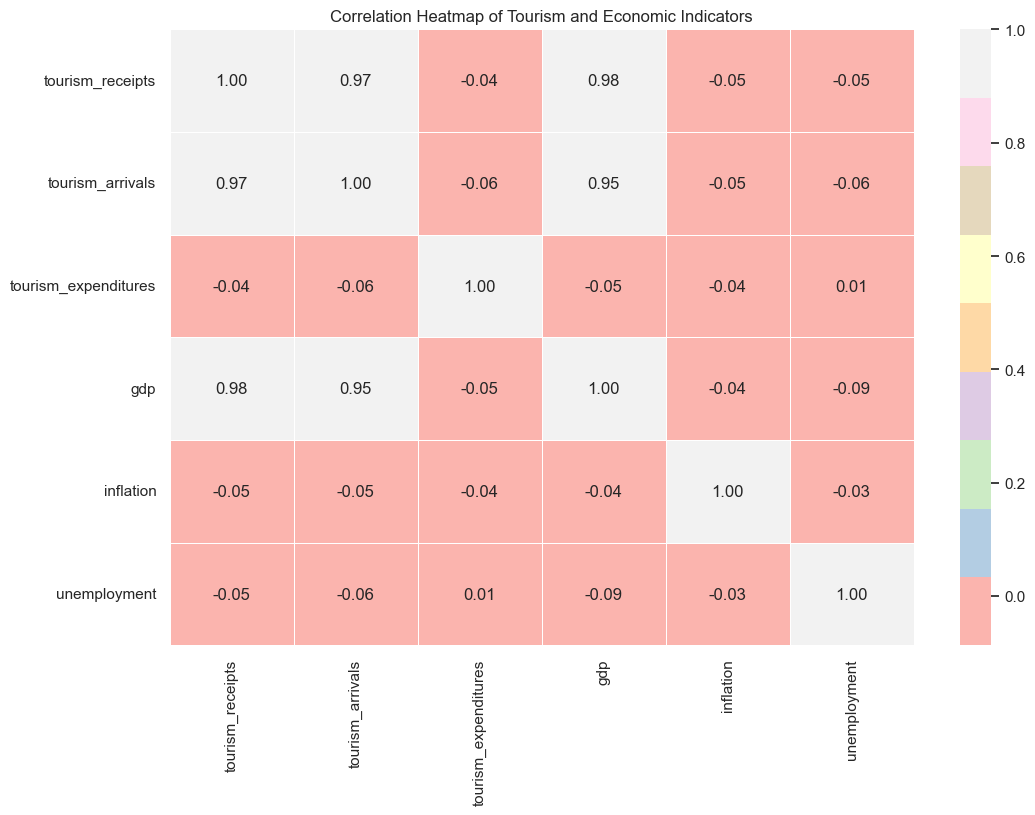

In [11]:
# Correlation heatmap of selected indicators
correlation_matrix = df[['tourism_receipts', 'tourism_arrivals', 'tourism_expenditures', 'gdp', 'inflation', 'unemployment']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Tourism and Economic Indicators')
plt.show()

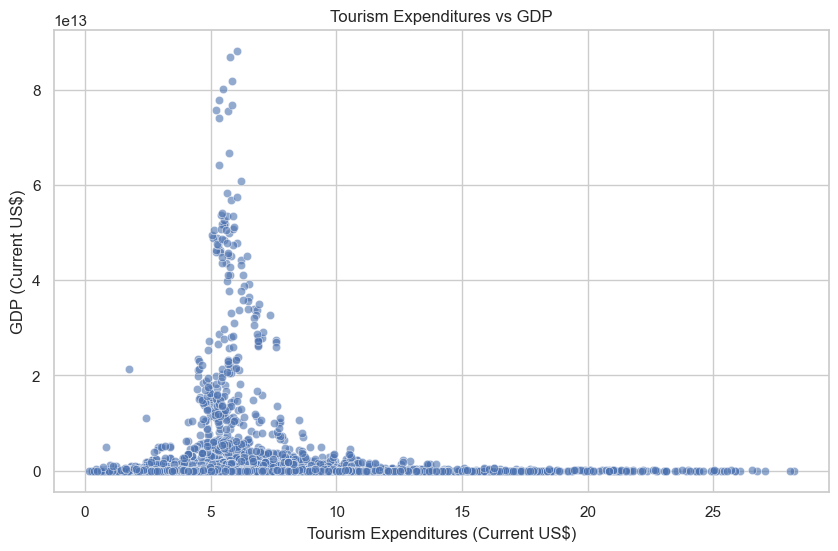

In [13]:
# Scatter plot of Tourism Expenditures vs GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tourism_expenditures', y='gdp', data=df, alpha=0.6)
plt.title('Tourism Expenditures vs GDP')
plt.xlabel('Tourism Expenditures (Current US$)')
plt.ylabel('GDP (Current US$)')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_13204\1367276206.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tourism_receipts.index, y=top_tourism_receipts.values, palette='pastel')


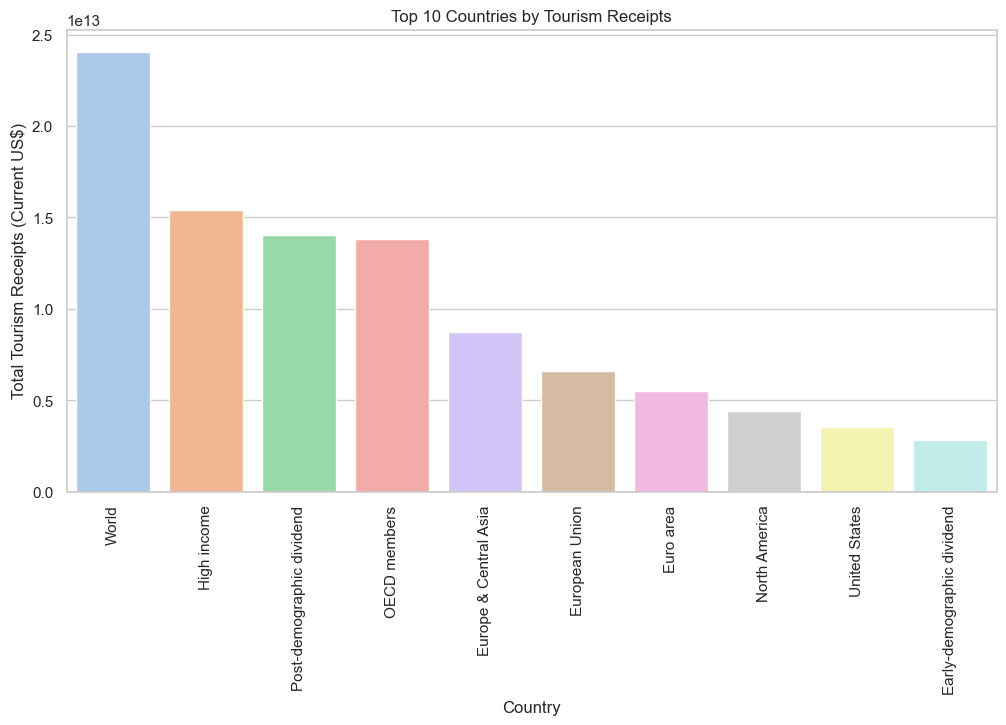

In [15]:
# Bar plot for Top 10 Countries by Tourism Receipts
top_tourism_receipts = df.groupby('country')['tourism_receipts'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_tourism_receipts.index, y=top_tourism_receipts.values, palette='pastel')
plt.title('Top 10 Countries by Tourism Receipts')
plt.xlabel('Country')
plt.ylabel('Total Tourism Receipts (Current US$)')
plt.xticks(rotation=90)
plt.show()

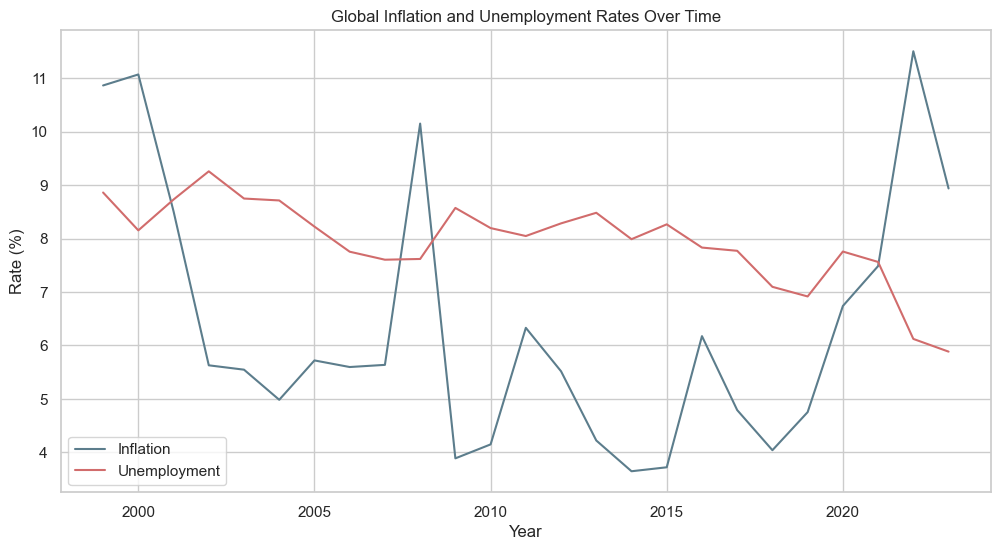

In [17]:
# Inflation and Unemployment rate over time (global average)
plt.figure(figsize=(12, 6))
global_inflation = df.groupby('year')['inflation'].mean()
global_unemployment = df.groupby('year')['unemployment'].mean()

plt.plot(global_inflation, label='Inflation', color='#5C7D8C')
plt.plot(global_unemployment, label='Unemployment', color='#D16C6C')
plt.title('Global Inflation and Unemployment Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
!pip install geopandas

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ---------------------------------------  317.4/323.6 kB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   -- ------------------------------------- 0.9/16.2 MB 18.7 MB/s eta 0:00:01
   ---- ----------------------------------- 1.6/16.2 MB 20.6 MB/s eta 0:00:01
   ----- ---------------------------------- 2.4/16.2 MB 19.2 MB/s eta 0:00:01
   ------- -------------------------------- 3.2/16.2 MB 18.6 MB/s eta 0:00:01
   ---------- ----------------------------- 4.1/16.2 MB 18.6 MB/s eta 0:00:01
   ------------ --------------------------- 5.0/16.2 MB 18.8 MB/s eta 0:00:01
   -------------- ------------------------- 5.9/16.2 MB 18.9 MB/s eta 0:00:01
   ---------------- ----------------------- 6.7/16.2 MB 18.0 MB/s eta 0:00:01
   ------------------- -------------------- 7.7/16.2 MB 18.2 MB/s eta 0:00:

In [30]:
import zipfile

# Path to the ZIP file
zip_file_path = r"C:\Users\dell\Desktop\MyDocs\Docs\MK\110m_cultural.zip"

# Open the ZIP file and list its contents
with zipfile.ZipFile(zip_file_path, 'r') as z:
    z.printdir()  # Print the contents of the ZIP file

File Name                                             Modified             Size
ne_110m_populated_places_simple.prj            2022-05-13 14:18:18          145
ne_110m_admin_0_countries.shx                  2022-05-08 21:46:24         1516
ne_110m_admin_0_countries_lakes.shx            2022-05-08 21:46:24         1516
ne_110m_admin_0_pacific_groupings.prj          2017-08-12 17:32:22          147
ne_110m_admin_0_countries.shp                  2022-05-08 21:46:24       180924
ne_110m_admin_0_countries.cpg                  2021-08-01 10:23:54            5
ne_110m_admin_0_countries_lakes.cpg            2021-08-01 10:23:54            5
ne_110m_admin_1_states_provinces_lines.README.html 2022-05-08 21:28:34        39906
ne_110m_admin_0_countries_lakes.shp            2022-05-08 21:46:24       182796
ne_110m_admin_0_map_units.prj                  2022-05-08 21:46:24          147
ne_110m_admin_1_states_provinces.prj           2022-05-08 21:46:26          147
ne_110m_populated_places.shx        

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


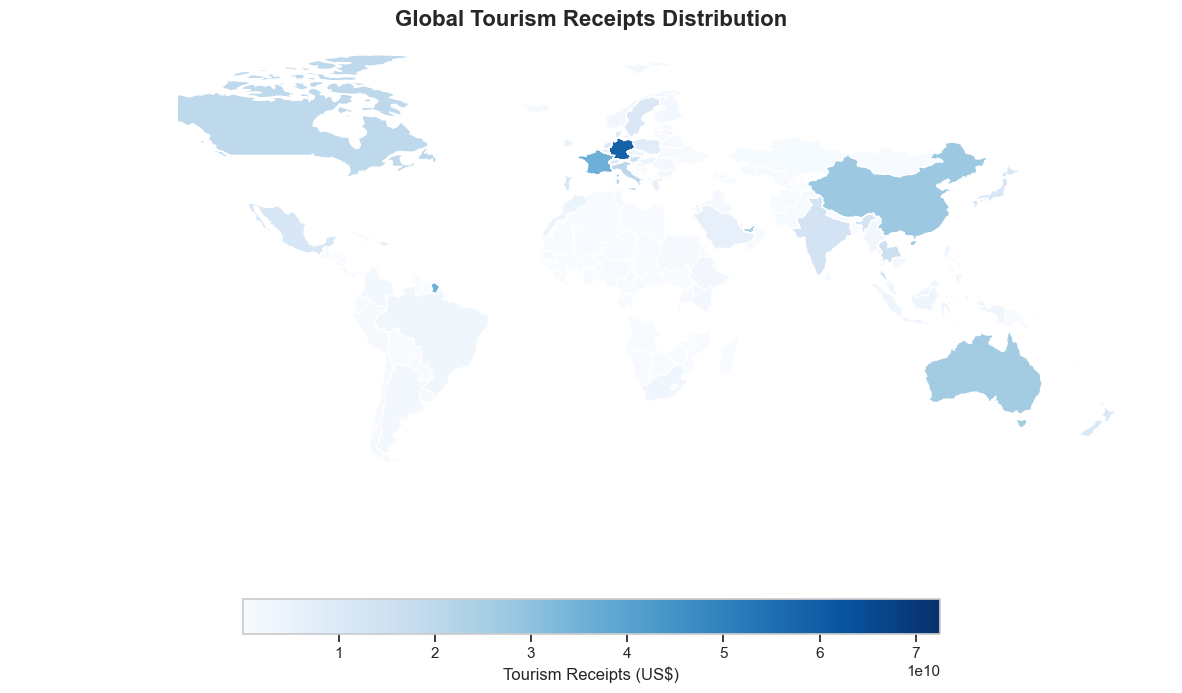

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the correct layer from the ZIP file (use the exact layer name you found)
world = gpd.read_file(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\110m_cultural\ne_110m_admin_0_countries.shp")

# Check the column names to find the correct one for merging
print(world.columns)

# Merge with tourism receipts data (assuming 'df' is your DataFrame containing tourism data)
# Make sure 'country' in your DataFrame matches the correct column name in the 'world' GeoDataFrame
merged = world.set_index('ADMIN').join(df.set_index('country'))

# Plot the choropleth map using Seaborn's pastel colors
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='tourism_receipts', ax=ax, legend=True, cmap='Blues', 
            legend_kwds={'label': "Tourism Receipts (US$)", 'orientation': "horizontal", 'shrink': 0.6})

# Customize title and remove axis
plt.title('Global Tourism Receipts Distribution', fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()